# iPython notebook - Daryna analysis - Conversions by website pages


## 1. Import libraries

In [43]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options


 2. Settings

In [44]:
# Time period 24th Jan - 24th April (arbitrary )

# API credentials
# Email address 705762800217-compute@developer.gserviceaccount.com
# Key IDs 948ee8e2a420ef14a5d5a29bd35104fe2f1e6ed4
 

In [45]:
# open file. It is requested via API explorer using request parameters:

#Account: TMRW Tech Hub
#Property: TMRW
#View: All Web Site Data
#ids: ga:123303369
#start-date: 2017-01-24
#end-date: 2017-04-24

#metrics
#ga:sessions
#ga:sessionsWithEvent

#dimensions
#ga:pagePath

#sort
#-ga:sessionsWithEvent

#filter
#ga:sessions>10




In [46]:
# Open file
TMRW_eventss= pd.read_csv("C:\ProgramData\Anaconda3/tmrw_events.csv")
TMRW_eventss



,ga:pagePath,ga:sessions,ga:sessionsWithEvent
0,'/,4436,82
1,'/TMRW_FAQs.php,100,26
2,'/TMRW_Byte_Cafe.php,218,23
3,'/TMRW_the_team.php,99,10
4,'/trainstrikes.php,13,0
5,'/voteforbyte.php,31,0


In [47]:
TMRW_events.columns=["page","sessions","unique_events"]
TMRW_events

,page,sessions,unique_events
0,'/,4436,82
1,'/TMRW_FAQs.php,100,26
2,'/TMRW_Byte_Cafe.php,218,23
3,'/TMRW_the_team.php,99,10
4,'/trainstrikes.php,13,0
5,'/voteforbyte.php,31,0


In [67]:
TMRW_events_filter = TMRW_events[TMRW_events.unique_events > 1]
TMRW_events_filter

,page,sessions,unique_events
0,'/,4436,82
1,'/TMRW_FAQs.php,100,26
2,'/TMRW_Byte_Cafe.php,218,23
3,'/TMRW_the_team.php,99,10


In [49]:
TMRW_events_filter.describe()

,sessions,unique_events
count,4.00000,4.000000
mean,1213.25000,35.250000
std,2149.22612,31.930915
min,99.00000,10.000000
25%,99.75000,19.750000
50%,159.00000,24.500000
75%,1272.50000,40.000000
max,4436.00000,82.000000


In [66]:
page=TMRW_events_filter.page
print(page)

0                      '/
1         '/TMRW_FAQs.php
2    '/TMRW_Byte_Cafe.php
3     '/TMRW_the_team.php
Name: page, dtype: object


In [51]:
#calculate rate as unique_events/sessions for each page
rate=[TMRW_events_filter.unique_events / TMRW_events_filter.sessions]
rate

[0    0.018485
 1    0.260000
 2    0.105505
 3    0.101010
 dtype: float64]

In [101]:
#join page and rate ???

data = [TMRW_events_filter.page, rate]
print(data)

[0                      '/
1         '/TMRW_FAQs.php
2    '/TMRW_Byte_Cafe.php
3     '/TMRW_the_team.php
Name: page, dtype: object, [0    0.018485
1    0.260000
2    0.105505
3    0.101010
dtype: float64]]


In [100]:
import numpy as np
from bokeh.io import output_notebook
from bokeh.charts import Bar, show

output_notebook()
p = Bar(TMRW_events_filter, 'page', values='unique_events', title="Events per page")
show(p)

Loading BokehJS ...

In [98]:
selected=TMRW_events_filter.loc[:,'page']
selected

0                      '/
1         '/TMRW_FAQs.php
2    '/TMRW_Byte_Cafe.php
3     '/TMRW_the_team.php
Name: page, dtype: object

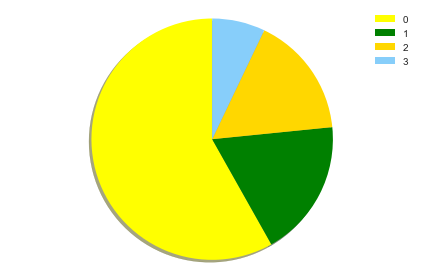

In [99]:
labels = selected.index
sizes = TMRW_events_filter["unique_events"]
colors = ['yellow','green', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()